#**Extracting Data Using kaggle**

In [8]:
# installing the Kaggle library
!pip install kaggle

In [9]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:10<00:00, 114MB/s]
100% 812M/812M [00:10<00:00, 83.8MB/s]


In [11]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [12]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [13]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [14]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


#**Importing Libraries**

In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2
import glob

# **Image Preprocessing**

## Display Dogs Images

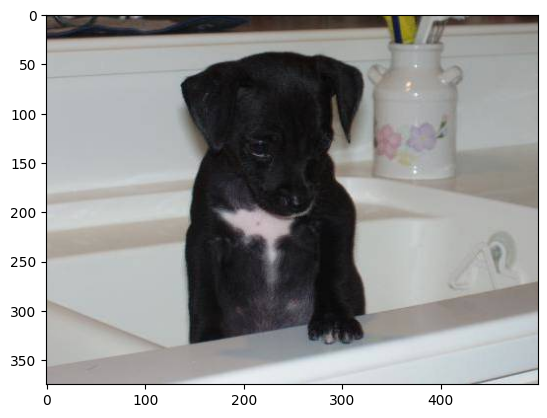

In [16]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

## Display Cats Images

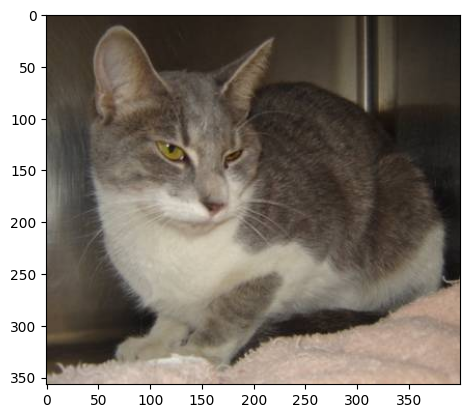

In [17]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [18]:
# Printing first 3 files
file_names = os.listdir('/content/train/')
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
dog
cat
cat


In [19]:
# Counting total number of cats and dogs images
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


## Resizing all the Images

In [20]:
# Creating a new directory for resized images
os.mkdir('/content/image resized')

In [21]:
orignal_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(orignal_folder)[i]
  img_path = orignal_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

## Displaying resized Cat Image

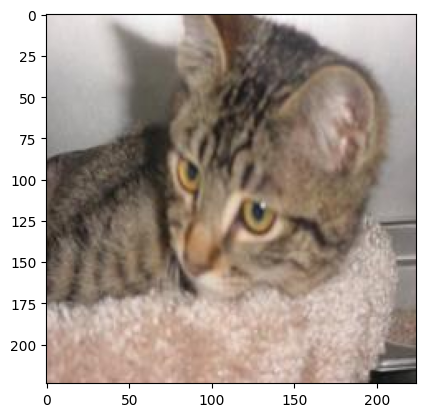

In [22]:
img = mpimg.imread('/content/image resized/cat.10031.jpg')
imgplt = plt.imshow(img)
plt.show()

## Displaying Resized Dog Image

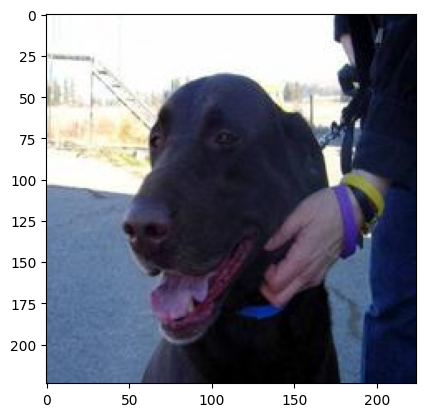

In [28]:
img = mpimg.imread('/content/image resized/dog.3669.jpg')
imgplt = plt.imshow(img)
plt.show()

## Providing Labels to the Image

**Dog --> 1**

**Cat --> 0**

In [29]:
filenames = os.listdir('/content/image resized/')
lables = []
for i in range(2000):
  file_name = filenames[i]
  lable = file_name[0:3]

  if lable == 'dog':
    lables.append(1)
  else:
    lables.append(0)

In [27]:
print(filenames[0:5])

['cat.11924.jpg', 'cat.9889.jpg', 'dog.3669.jpg', 'cat.4918.jpg', 'cat.10604.jpg']


In [31]:
print(lables)
print(len(lables))

[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 

## Counting total number Dogs and Cats Images in these 2000 Images

In [32]:
value , counts = np.unique(lables , return_counts = True)
print(value)
print(counts)

[0 1]
[1004  996]


## Converting All the Images into Numpy Arrays

empty list named files. Files.extend command is used to locate the file and at the end converting each images into numpy array.

In [35]:
image_directory = '/content/image resized/'
image_extension = ['png' , 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
print(dog_cat_images)

[[[[ 26  55  76]
   [ 31  62  85]
   [ 46  81 107]
   ...
   [ 46  71  81]
   [ 43  70  80]
   [ 42  69  79]]

  [[ 14  43  64]
   [ 27  58  81]
   [ 50  83 109]
   ...
   [ 46  71  81]
   [ 43  70  80]
   [ 42  69  79]]

  [[  5  32  53]
   [ 27  58  81]
   [ 55  89 113]
   ...
   [ 43  69  81]
   [ 42  68  80]
   [ 41  67  79]]

  ...

  [[ 41  40  36]
   [ 45  44  40]
   [ 51  46  43]
   ...
   [ 50  72  84]
   [ 49  71  83]
   [ 49  71  83]]

  [[ 42  41  37]
   [ 46  45  41]
   [ 53  48  45]
   ...
   [ 49  71  83]
   [ 48  70  82]
   [ 48  70  82]]

  [[ 42  41  37]
   [ 46  45  41]
   [ 53  48  45]
   ...
   [ 49  71  83]
   [ 48  70  82]
   [ 48  70  82]]]


 [[[190 184 173]
   [178 173 164]
   [148 149 140]
   ...
   [ 85  98 100]
   [ 84  98  97]
   [ 96 110 109]]

  [[189 183 172]
   [179 174 165]
   [151 152 143]
   ...
   [ 83  96  98]
   [ 84  98  97]
   [ 98 112 111]]

  [[186 180 169]
   [181 176 167]
   [155 156 147]
   ...
   [ 83  96  98]
   [ 86 100  99]
   [102 116

In [37]:
type(dog_cat_images)

numpy.ndarray

# **Splitting the Data**

In [38]:
X = dog_cat_images
Y = np.asarray(lables)

## Train Test Split

In [39]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

#**Scaling the Data**

In [40]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [42]:
print(X_train_scaled , X_test_scaled)

[[[[0.10588235 0.09803922 0.21568627]
   [0.09019608 0.08235294 0.19607843]
   [0.0627451  0.05882353 0.16078431]
   ...
   [0.17254902 0.18039216 0.22352941]
   [0.21568627 0.21960784 0.2745098 ]
   [0.25098039 0.25490196 0.30980392]]

  [[0.09411765 0.08627451 0.20392157]
   [0.07843137 0.07058824 0.18431373]
   [0.05490196 0.05098039 0.15294118]
   ...
   [0.20784314 0.21568627 0.25882353]
   [0.21176471 0.21960784 0.2627451 ]
   [0.21960784 0.22745098 0.27058824]]

  [[0.07843137 0.06666667 0.19215686]
   [0.06666667 0.05882353 0.17647059]
   [0.05098039 0.04705882 0.14901961]
   ...
   [0.24705882 0.26666667 0.30196078]
   [0.22352941 0.23137255 0.27058824]
   [0.20784314 0.21568627 0.25490196]]

  ...

  [[0.31764706 0.38823529 0.61960784]
   [0.27843137 0.34901961 0.58039216]
   [0.22745098 0.28627451 0.52941176]
   ...
   [0.3254902  0.41176471 0.43137255]
   [0.34901961 0.44705882 0.4627451 ]
   [0.38039216 0.47843137 0.49411765]]

  [[0.38823529 0.45490196 0.67843137]
   [0.3

# **Building the Neural Network**

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model,
                                  input_shape=(224,224,3),
                                  trainable= False)

In [46]:
num_of_classes = 2 # Types of images we have like cats and dogs in our case 2 types.

model = tf.keras.Sequential([

    pretrained_model, # First Layer
    tf.keras.layers.Dense(num_of_classes) # Output Layer like either a Dog or a Cat

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## Compiling the Neural Network

In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

#**Training the Model**

In [48]:
model.fit(X_train_scaled, Y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 71s 1s/step - loss: 0.2064 - acc: 0.9137
Epoch 2/10
50/50 [==============================] - 59s 1s/step - loss: 0.0646 - acc: 0.9819
Epoch 3/10
50/50 [==============================] - 64s 1s/step - loss: 0.0474 - acc: 0.9856
Epoch 4/10
50/50 [==============================] - 61s 1s/step - loss: 0.0338 - acc: 0.9937
Epoch 5/10
50/50 [==============================] - 80s 2s/step - loss: 0.0284 - acc: 0.9931
Epoch 6/10
50/50 [==============================] - 77s 2s/step - loss: 0.0213 - acc: 0.9975
Epoch 7/10
50/50 [==============================] - 75s 2s/step - loss: 0.0176 - acc: 0.9975
Epoch 8/10
50/50 [==============================] - 56s 1s/step - loss: 0.0149 - acc: 0.9987
Epoch 9/10
50/50 [==============================] - 55s 1s/step - loss: 0.0129 - acc: 0.9994
Epoch 10/10
50/50 [==============================] - 59s 1s/step - loss: 0.0108 - acc: 1.0000


#**Model Evaluation**

In [50]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0270 - acc: 0.9850
Test Loss = 0.02695455402135849
Test Accuracy = 0.9850000143051147


#**Building a Predictive System**

Path of the image to be predicted: /content/train/cat.4352.jpg


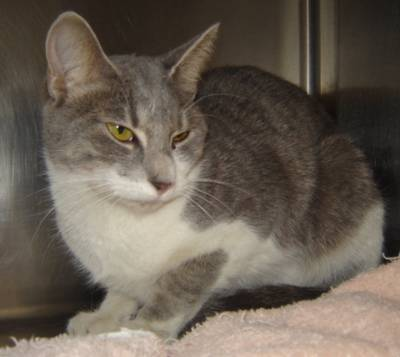

1/1 [==============================] - 0s 47ms/step
[[ 4.6884174 -4.53611  ]]
0
The image represents a Cat


In [53]:
input_image_path = input('Path of the image to be predicted: ')

# Converting all the Input Image to Numpy Arrays
input_image = cv2.imread(input_image_path)

# Printing the Input Image
cv2_imshow(input_image)

# Resizing the Input Image
input_image_resize = cv2.resize(input_image, (224,224))

# Scaling the Input Image to get the data between 0 and 1 making it easy for our neural network to read
input_image_scaled = input_image_resize/255

# Reshaping the Input Images to only get the lables as output
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

# Predcitions giving the Probabilities by default
input_prediction = model.predict(image_reshaped)
print(input_prediction)

# Converting Probabilities to Lables
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

# If Else loop to print that image either represents A Dog or A Cat
if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/train/dog.3669.jpg


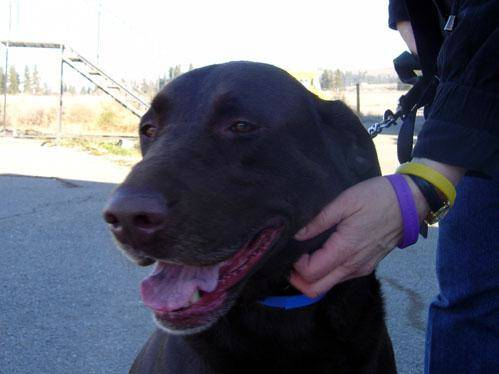

1/1 [==============================] - 0s 119ms/step
[[-3.761245  3.019765]]
1
The image represents a Dog


In [54]:
input_image_path = input('Path of the image to be predicted: ')

# Converting all the Input Image to Numpy Arrays
input_image = cv2.imread(input_image_path)

# Printing the Input Image
cv2_imshow(input_image)

# Resizing the Input Image
input_image_resize = cv2.resize(input_image, (224,224))

# Scaling the Input Image to get the data between 0 and 1 making it easy for our neural network to read
input_image_scaled = input_image_resize/255

# Reshaping the Input Images to only get the lables as output
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

# Predcitions giving the Probabilities by default
input_prediction = model.predict(image_reshaped)
print(input_prediction)

# Converting Probabilities to Lables
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

# If Else loop to print that image either represents A Dog or A Cat
if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')